In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tf.transformations import euler_from_quaternion

In [27]:
# TODO: refactor this!

def calculate_costs(cv):
    n_misc = 15
    ee_pos_goal_ = [0.65, -0.4, 0.0]
    acc = cv[:, 14:21]
    cop_x = cv[:,-n_misc]
    cop_y = cv[:,-n_misc+1]

    ee_pos_x = cv[:,-n_misc+2]
    ee_pos_y = cv[:,-n_misc+3]
    ee_pos_z = cv[:,-n_misc+4]

    ee_rot_x = cv[:,-n_misc+5]
    ee_rot_y = cv[:,-n_misc+6]
    ee_rot_z = cv[:,-n_misc+7]
    ee_rot_w = cv[:,-n_misc+8]
    
    x_size = 0.21
    y_size = 0.13
    sp_y_1 = cv[0, -2] - y_size/2
    sp_y_2 = cv[0, -5] + y_size/2
    sp_x_1 = max(cv[0, -6] - x_size/2, cv[0, -3] - x_size/2)
    sp_x_2 = min(cv[0, -6] + x_size/2, cv[0, -3] + x_size/2)
    
    stability_cost = [0]*len(cop_x)
    for i in range(len(cop_x)):
        if cop_x[i] > sp_x_1 and cop_x[i] < sp_x_2 and cop_y[i] > sp_y_1 and cop_y[i] < sp_y_2:
            if min(abs(sp_x_1-cop_x[i]), abs(sp_x_2-cop_x[i]), abs(sp_y_1-cop_y[i]), abs(sp_y_2-cop_y[i])) > 0.0095:
                stability_cost[i] = (min(x_size/2, (sp_y_2-sp_y_1)/2) / (min(abs(sp_x_1-cop_x[i]), abs(sp_x_2-cop_x[i]), abs(sp_y_1-cop_y[i]), abs(sp_y_2-cop_y[i]))) - 1)**2
            else:
                stability_cost[i] = 100
        else:
            stability_cost[i] = 100
    stability_cost = np.array(stability_cost)/100
    
    dist_to_goal = (np.sqrt((ee_pos_x[-1] - ee_pos_goal_[0])**2 + (ee_pos_y[-1]-ee_pos_goal_[1])**2 + (ee_pos_z[-1]-ee_pos_goal_[2])**2))
  
    desired_goal_euler = euler_from_quaternion(quaternion=[0.5, -0.5, -0.5, 0.5], axes='rxyz')
    goal_euler = euler_from_quaternion(quaternion=[ee_rot_x[-1], ee_rot_y[-1], ee_rot_z[-1], ee_rot_w[-1]], axes='rxyz')
    
#     orientation_cost = np.sum(np.sqrt((goal_euler[0]-desired_goal_euler[0])**2+(goal_euler[1]-desired_goal_euler[1])**2+(goal_euler[2]-desired_goal_euler[2])**2)
    orientation_cost = np.linalg.norm(np.array(goal_euler) - np.array(desired_goal_euler))
#     q_desired_goal = quaternion.from_float_array([0.5, 0.5, -0.5, -0.5])
#     q_goal = quaternion.from_float_array([ee_rot_w[-1], ee_rot_x[-1], ee_rot_y[-1], ee_rot_z[-1]])
#     q_diff = q_goal * q_desired_goal.inverse()
#     q_diff = quaternion.from_float_array(quaternion.as_float_array(q_diff) / np.linalg.norm(quaternion.as_float_array(q_diff)))
#     orientation_cost = np.sum(np.abs(quaternion.as_rotation_vector(q_diff)[:2]))
    
    acc_sums = np.array([np.sum(acc[:,a])/len(acc[:,a]) for a in range(acc.shape[1])])
    acc_cost = np.sum(acc_sums)/len(acc_sums)

    
    return np.sum(stability_cost)/len(stability_cost), dist_to_goal, orientation_cost, acc_cost

In [2]:
cv = np.loadtxt("results_learning_wb_goal_covar_adapt_initial_traj_3_tau/updates_rarm/update00149/eval_cost_vars.txt")
n_misc = 15
ee_rot_x = cv[:,-n_misc+5]
ee_rot_y = cv[:,-n_misc+6]
ee_rot_z = cv[:,-n_misc+7]
ee_rot_w = cv[:,-n_misc+8]

In [5]:
desired_goal_euler = euler_from_quaternion(quaternion=[0.5, -0.5, -0.5, 0.5], axes='rxyz')
goal_euler = euler_from_quaternion(quaternion=[ee_rot_x[-1], ee_rot_y[-1], ee_rot_z[-1], ee_rot_w[-1]], axes='rxyz')
    
orientation_cost = np.sum(np.sqrt((goal_euler[0]-desired_goal_euler[0])**2+(goal_euler[1]-desired_goal_euler[1])**2+(goal_euler[2]-desired_goal_euler[2])**2))


In [14]:
# TODO: refactor this!

stab_cost = []
goal_cost = []
orientation_cost = []
acceleration_cost = []
for f in files:
    if "cost_vars" in f:
        cv = np.loadtxt(update+f)
        if (cv[-1,:] == 100).any():
            print(f)
        s, g, o, a = calculate_costs(cv)
        stab_cost.append(s)
        goal_cost.append(g)
        orientation_cost.append(o)
        acceleration_cost.append(a)
df = pd.DataFrame(columns=["stab", "goal", "orientation"])
df["stab"] = stab_cost
df["goal"] = goal_cost
df["orientation_cost"] = orientation_cost
df.describe()

NameError: name 'files' is not defined

In [34]:
stab_cost = []
goal_cost = []
orientation_cost = []
acceleration_cost = []

path = "results_learning_wb_goal_covar_adapt_initial_traj_6_dtw/updates_rarm/"
updates = np.sort(os.listdir(path))
for update in updates:
    if "update0" in update:
        cv = np.loadtxt(path+update+"/eval_cost_vars.txt")
        s, g, o, a = calculate_costs(cv)
        stab_cost.append(s)
        goal_cost.append(g)
        orientation_cost.append(o)
        acceleration_cost.append(a)

OSError: results_learning_wb_goal_covar_adapt_initial_traj_6_dtw/updates_rarm/update00150/eval_cost_vars.txt not found.

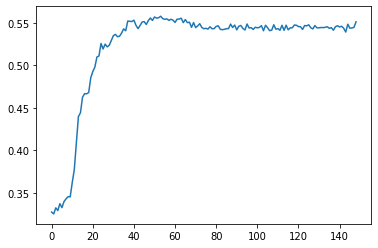

In [38]:
plt.plot(np.array(orientation_cost)[1:]*0.3)

In [ ]:
           
    
# roll = pi/2
# pitch = 0
# yaw = -pi/2           
# goal_orientation = (np.sqrt((ee_rpy_x[-1] - roll)**2 + (ee_rpy_y[-1]-pitch)**2 + (ee_rpy_z[-1] - yaw)**2))